# Experimentación proyecto Machine Learning

## Algoritmos basados en árboles de desición.

<h3> 1. Extraer data </h3>

- Extraemos la data del repositorio, dónde se encuentra almacenada, y lo almacenamos en nuestro ambiente de trabajo.
- Leemos la data descargada de nuestro ambiente de trabajo, para continuar con los respectivos análisis correspondiente.

In [1]:
# Extraer data del repositorio
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv

In [2]:
# Cargar la data
import pandas as pd
data = pd.read_csv('in-vehicle-coupon-recommendation.csv')
data.shape

(12684, 26)

### 2. Exploratory Data Analysis.

- Revisar estructura de la data.
- Valores nulos.
- Valores únicos x variable.
- Tipos de variables por defecto.
- Descripción de cada una de las variables.
 

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
# Valores nulos por variables
na = data.isna().sum()/len(data)
na[na>0].sort_values(ascending = False)

car                     0.991485
CoffeeHouse             0.017108
Restaurant20To50        0.014901
CarryAway               0.011905
RestaurantLessThan20    0.010249
Bar                     0.008436
dtype: float64

In [5]:
# Descartamos car por tener más del 99% de valores nulos
data = data.drop('car', axis = 1)
data.shape

(12684, 25)

In [6]:
# Cantidad de valores únicos por variable.
data.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

In [7]:
# Descartamos toCoupon_GEQ5min, ya que solamente contiene un valor distinto.
data = data.drop('toCoupon_GEQ5min', axis = 1)
data.shape

(12684, 24)

In [8]:
# tipo de variables
# Aunque a excepción de temperature que es discreta, todas las demás son cualitativas.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

#### Descripción de las variables.
- `destination` = Lugar de destino
- `passanger` = Pasajeros con quien va acompañado
- `weather` = Condición climática al conducir
- `temperature` = Temperatura al momento de conducir
- `time` = Hora en la que se le ofrece el cpón al conductor
- `coupon` = Tipo de cupón a canjear
- `expiration` = Caducidad del cupón en 1 día o 2 horas
- `gender` = Género (Masculino o Femenino)
- `age` = Edad
- `maritalStatus` = Estado Civil
- `has_children` = Tiene hijos
- `education` = Grado de Educación
- `occupation` = Ocupación u oficio
- `income` = Renta Anual
- `Bar` = ¿Cuántas veces va a un bar al mes?
- `CoffeeHouse` = ¿Cuántas veces va a una cafetería al mes?
- `CarryAway` = ¿Cuántas veces ordena comida para llevar al mes?
- `RestaurantLessThan20` = ¿Cuántas veces ha ido a un restaurante con un gasto promedio de 20 dólares por persona al mes? 
- `Restaurant20To50` = ¿Cuántas veces ha ido a un restaurante con un gasto promedio entre 20 y 50 dólares por persona al mes?
- `toCoupon_GEQ15min` = ¿Tarda más de 15 minutos en llegar al restaurante/bar para canjear el cupón?
- `toCoupon_GEQ25min` = ¿Tarda más de 25 minutos en llegar al restaurante/bar para canjear el cupón?
- `direction_same` = ¿El restaurante/bar está en la misma dirección que su destino actual?
- `direction_opp` = ¿El restaurante/bar está en diferente dirección a su destino actual? 
- `Y` = Acepta el cupón.

#### 2.1. Preprocesamiento de la data.
- Codificar variables. Se utiliza one hot encoding para todas las variables, ya que en principio todas pueden ser tratadas como cualitativas, ya sean nominales u ordinales.

- No hacemos tratamiento de valores nulos, ya que al convertirlo en dummies, estos son omitidos, o en su defecto pueden convertirse en una clase más.

- Para tener todas las variables con valores entre 0 y 1, también transformamos en dummies la variable temperature

In [9]:
# Utilizamos one hot encoding para codificar las variables.
data['temperature'] = data['temperature'].astype(str)
data = pd.get_dummies(data) # drop_first = True
data.head()

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,1,0,0,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,1,0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [10]:
#eliminar registros iguales
print(data.shape)
data = data.drop_duplicates(keep = 'first')
print(data.shape)

(12684, 111)
(12610, 111)


## Dividir la data en train y test.
- Separamos en un dataset todas las variables X y en otro arreglo la variable y.
- Dividimos tanto X como y en dos datasets: train y test. Para el test consideramos el 20% de la data, además nos aseguramos que la distribución de las variables X e y sean lo más parecidas en ambos datasets (shuffle-stratify) y seteamos un punto aleatorio de inicio.

In [11]:
# Dividir en X e y
X = data.drop('Y', axis = 1)
y = data[['Y']].copy()
print(X.shape, y.shape)

(12610, 110) (12610, 1)


In [12]:
# Dividir en train y test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 33, shuffle = True, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10088, 110) (2522, 110) (10088, 1) (2522, 1)


## Entrenamiento.
En esta etapa probaremos algoritmos basados en Árboles de clasificación, entre los cuales se tiene:
- Desición Trees Clasification.
- Random Forest.
- XgBoost.
- LightGBM.
- CatBoost


In [13]:
# Data en y balanceada.
data.Y.value_counts()/len(data)*100

1    56.756542
0    43.243458
Name: Y, dtype: float64

### Desición Tree Classifier.
- El modelo base, genera overfiting. (AUC train = 0.99 y auc en test 0.68).
- Ajustamos hiperparámetros mediante RandomSearch y greadsearch, además utilizamos Cross Validation.
- Reentrenamos modelo con mejores parámetros.
- Graficamos curva ROC.
- Graficamos y encontramos variables importantes.

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
#Entrenamos el árbol de clasificación - Modelo base.
model_dtc_base = DecisionTreeClassifier()
model_dtc_base.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# Performance del modelo
from sklearn.metrics import *

def performance_model(X, y, model):
  y_pred = model.predict(X)
  y_prob = model.predict_proba(X)[:,1]
  auc = roc_auc_score(y, y_prob)
  recall = recall_score(y, y_pred, pos_label=1)
  f1 = f1_score(y, y_pred, pos_label = 1)

  print('-'*55)
  print('Métricas de rendimiento')
  print('-'*55)
  print('\n', classification_report(y, y_pred))
  print(f'Área bajo la curva = {auc}\n\nMatriz de confusión')
  print(confusion_matrix(y, y_pred))

  return y_prob, auc, recall, f1

In [17]:
# Rendimiento del modelo en data de entrenamiento
model_dtc_base_ptrain = performance_model(X_train, y_train, model_dtc_base)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4362
           1       1.00      1.00      1.00      5726

    accuracy                           1.00     10088
   macro avg       1.00      1.00      1.00     10088
weighted avg       1.00      1.00      1.00     10088

Área bajo la curva = 0.9999927732970886

Matriz de confusión
[[4362    0]
 [  19 5707]]


In [18]:
# Rendimiento del modelo en data de testeo
p_model_dtc_base_ptest = performance_model(X_test, y_test, model_dtc_base)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.64      0.67      0.65      1091
           1       0.74      0.71      0.72      1431

    accuracy                           0.69      2522
   macro avg       0.69      0.69      0.69      2522
weighted avg       0.70      0.69      0.69      2522

Área bajo la curva = 0.6910075511410619

Matriz de confusión
[[ 732  359]
 [ 415 1016]]


Ajustamos hiperparámetros para mejorar el rendimiento del modelo y controlar el overfitting. Dentro de los principales parámetros que tunearemos están:
- ``max_features`` = Número de características a considerar al buscar la mejor división.
- ``ccp_alpha`` = Parámetro de complejidad utilizado para la poda de complejidad de costo mínimo. 
- ``max_depth`` = Profundidad máxima del árbol.
- ``criterion`` = Función para medir la calidad de una división. Los criterios admitidos son "gini" para la impureza de Gini,  "log_loss" y "entropía".
- `min_samples_leaf` = Numero mínimo de muestras que deben quedar en cada hoja del árbol

In [19]:
from pprint import pprint
import numpy as np

max_features = ['sqrt', 'log2'] + [int(x) for x in np.linspace(start = 20, stop = 100, num = 10)]
max_depth = [int(x) for x in np.linspace(1, 50, num = 11)] + [None]
criterion = ['gini', 'entropy']
min_samples_leaf = [1, 2, 4]
ccp_alpha = [0.1, .01, .001]

random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion,
               'min_samples_leaf': min_samples_leaf,
               'ccp_alpha':ccp_alpha}

print('Los valores a probar en la búsqueda aleatoria son:')
pprint(random_grid)

print()
print('Si se probara todas las combinaciones se requeriría entrenar', 
      len(random_grid['max_features']) *
      len(random_grid['max_depth']) *
      len(random_grid['criterion']) *
      len(random_grid['min_samples_leaf'])*
      len(random_grid['ccp_alpha']),
      'modelos'
      )

Los valores a probar en la búsqueda aleatoria son:
{'ccp_alpha': [0.1, 0.01, 0.001],
 'criterion': ['gini', 'entropy'],
 'max_depth': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'max_features': ['sqrt', 'log2', 20, 28, 37, 46, 55, 64, 73, 82, 91, 100],
 'min_samples_leaf': [1, 2, 4]}

Si se probara todas las combinaciones se requeriría entrenar 2592 modelos


In [20]:
# Encontraremos los mejores parámetros utilizando el 10% de las combinaciones posibles.
n_iter = int(2592*0.1)
n_iter

259

In [31]:
%%time
from sklearn.model_selection import RandomizedSearchCV

model_dtc_opt = DecisionTreeClassifier()
model_dtc_opt = RandomizedSearchCV(estimator = model_dtc_opt, 
                               param_distributions = random_grid, 
                               n_iter = n_iter, 
                               cv = 10,          # Validación cruzada 3-fold
                               verbose=2, 
                               random_state=0, 
                               n_jobs = -1     # Paralelizar en todos los cores disponibles
                               )
model_dtc_opt.fit(X_train, y_train)

Fitting 10 folds for each of 259 candidates, totalling 2590 fits
Wall time: 36.9 s


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=259,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.1, 0.01, 0.001],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 15, 20, 25, 30,
                                                      35, 40, 45, 50, None],
                                        'max_features': ['sqrt', 'log2', 20, 28,
                                                         37, 46, 55, 64, 73, 82,
                                                         91, 100],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=0, verbose=2)

In [33]:
# Recuperamos los mejores hiperprámetros del modelo
model_dtc_opt_best = model_dtc_opt.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model_dtc_opt.best_params_)
print()

print('Exactitud luego de búsqueda aleatoria en entrenamiento:', model_dtc_opt_best.score(X_train, y_train))
print('Exactitud luego de búsqueda aleatoria en validación:', model_dtc_opt_best.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_dtc_opt_best.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_dtc_opt_best.predict_proba(X_test)[:,1]))

Los hiperparámetros del mejor modelo son:
{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 82,
 'min_samples_leaf': 4}

Exactitud luego de búsqueda aleatoria en entrenamiento: 0.7114393338620143
Exactitud luego de búsqueda aleatoria en validación: 0.7045995241871531

AUC luego de búsqueda aleatoria en entrenamiento: 0.7699889801788956
AUC luego de búsqueda aleatoria en validación: 0.7536066322448903


In [34]:
# Utilizzamos los mejores parámetros encontrados anteriormente, para configurar valores cercanos y utilizarlos en greadsearch.
ccp_alpha = [0.09,0.001, 0.002]
max_depth = [4,5,6,7,8,9,10,12,15,20, 30]
max_features = [70, 75,80,90]
min_samples_leaf = [1,2,3,4,5]

search_grid = {'ccp_alpha': ccp_alpha,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'max_features':max_features}

print('Los valores a probar en la búsqueda por grilla son:')
pprint(search_grid)

Los valores a probar en la búsqueda por grilla son:
{'ccp_alpha': [0.09, 0.001, 0.002],
 'max_depth': [4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 30],
 'max_features': [70, 75, 80, 90],
 'min_samples_leaf': [1, 2, 3, 4, 5]}


In [35]:
%%time
from sklearn.model_selection import GridSearchCV

model_dtc_opt = DecisionTreeClassifier(criterion = 'entropy')
model_dtc_opt = GridSearchCV(estimator = model_dtc_opt, 
                        param_grid = search_grid, 
                        cv = 10,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )
model_dtc_opt.fit(X_train, y_train)

Fitting 10 folds for each of 660 candidates, totalling 6600 fits
Wall time: 1min 44s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.09, 0.001, 0.002],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 30],
                         'max_features': [70, 75, 80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             verbose=2)

In [36]:
model_dtc_opt_best = model_dtc_opt.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model_dtc_opt.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento:', model_dtc_opt_best.score(X_train, y_train))
print('Exactitud luego de búsqueda en grilla en validación:', model_dtc_opt_best.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_dtc_opt_best.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_dtc_opt_best.predict_proba(X_test)[:,1]))

Los hiperparámetros del mejor modelo son:
{'ccp_alpha': 0.001, 'max_depth': 9, 'max_features': 75, 'min_samples_leaf': 3}

Exactitud luego de búsqueda en grilla en entrenamiento: 0.7150079302141158
Exactitud luego de búsqueda en grilla en validación: 0.6867565424266455

AUC luego de búsqueda aleatoria en entrenamiento: 0.7711141638092164
AUC luego de búsqueda aleatoria en validación: 0.7453313784531466


In [37]:
# Reentrenamiento del modelo con los mejores parámetros.
#Entrenamos el árbol de clasificación - Modelo base.
model_dtc_opt = DecisionTreeClassifier(ccp_alpha = 0.001, 
                                        max_depth = 9, 
                                        max_features= 75, 
                                        min_samples_leaf= 3)

model_dtc_opt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features=75,
                       min_samples_leaf=3)

In [38]:
# Rendimiento del modelo en data de entrenamiento
model_dtc_base_ptrain = performance_model(X_train, y_train, model_dtc_opt)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.65      0.65      0.65      4362
           1       0.74      0.73      0.73      5726

    accuracy                           0.70     10088
   macro avg       0.69      0.69      0.69     10088
weighted avg       0.70      0.70      0.70     10088

Área bajo la curva = 0.748137312319923

Matriz de confusión
[[2857 1505]
 [1535 4191]]


In [39]:
# Rendimiento del modelo en data de validación
model_dtc_base_ptest = performance_model(X_test, y_test, model_dtc_opt)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.64      0.66      0.65      1091
           1       0.74      0.72      0.73      1431

    accuracy                           0.70      2522
   macro avg       0.69      0.69      0.69      2522
weighted avg       0.70      0.70      0.70      2522

Área bajo la curva = 0.747701638653336

Matriz de confusión
[[ 720  371]
 [ 398 1033]]


In [40]:
# Guardar modelo entrenado.
import pickle
with open('model_dtc_opt.pkl', 'wb') as f:
  pickle.dump(model_dtc_opt, f)

### Visualización de la curva ROC

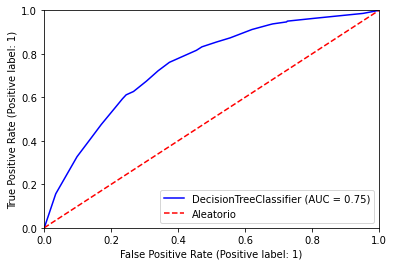

In [41]:
import matplotlib.pyplot as plt
y_pred_val = model_dtc_opt.predict_proba(X_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_val)
#print('AUC =', auc_roc)
#fig = plt.figure(figsize=(12,4))
#fig, ax = plt.subplots(figsize = (12,8))
#RocCurveDisplay.from_estimator
plot_roc_curve(model_dtc_opt, X_test, y_test, color = 'blue')
plt.plot([0,1], [0,1], linestyle='--', label = 'Aleatorio', color = 'red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

### Importancia de variables

FixedFormatter should only be used together with FixedLocator


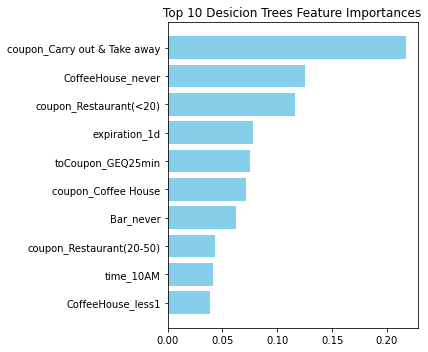

In [62]:
feature_names = X_test.columns#.tolist()
tree_feature_importances = model_dtc_opt.feature_importances_
sorted_idx = tree_feature_importances.argsort()

n_import = 10
y_ticks = np.arange(0, len(feature_names))[-n_import:]
fig, ax = plt.subplots(figsize = (6,5))
ax.barh(y_ticks[-n_import:], tree_feature_importances[sorted_idx][-n_import:], color = 'skyblue')
ax.set_yticklabels(feature_names[sorted_idx][-n_import:])
ax.set_yticks(y_ticks)
ax.set_title("Top 10 Desicion Trees Feature Importances")
fig.tight_layout()
plt.show()

In [43]:
# Utilizamos librería shap
#https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import shap
import matplotlib.pylab as pl
# print the JS visualization code to the notebook
shap.initjs()

In [75]:
# Damos formato a la data.
X1 = X_test.merge(y_test, left_index = True, right_index = True, how = 'inner')
X1.rename(columns = {'Y':'target'}, inplace = True)
X1.head()

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),...,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,target
70,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
5202,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5644,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1328,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1305,0,1,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,1


In [76]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model_dtc_opt)
shap_values = explainer.shap_values(X1)

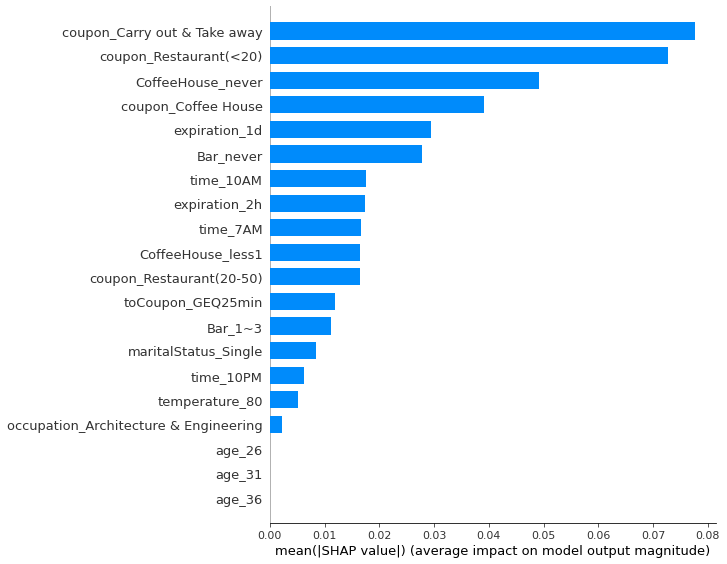

In [81]:
shap.summary_plot(shap_values[1], X1, plot_type="bar")

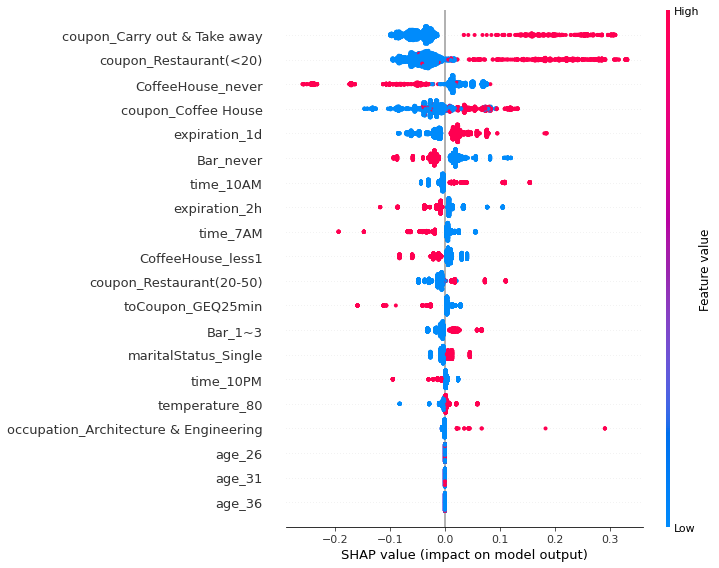

In [78]:
shap.summary_plot(shap_values[1], X1)

---------------

### Random Forest
- El modelo base, genera overfiting. (AUC train = 0.99 y auc en test 0.68).
- Ajustamos hiperparámetros mediante RandomSearch y greadsearch, además utilizamos Cross Validation.
- Reentrenamos modelo con mejores parámetros.
- Graficamos curva ROC.
- Graficamos y encontramos variables importantes.

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [83]:
#Entrenamos un modelo base
model_rf_base = RandomForestClassifier(oob_score = True)
model_rf_base.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(oob_score=True)

In [84]:
print('Exactitud del modelo inicial en entrenamiento:', model_rf_base.score(X_train, y_train))
print('Exactitud del modelo inicial en entrenamiento (Out of Bag):', model_rf_base.oob_score_)
print('Exactitud del modelo inicial en validación:', model_rf_base.score(X_test, y_test))
print()

print('AUC del modelo inicial en entrenamiento:', roc_auc_score(y_train, model_rf_base.predict_proba(X_train)[:,1]))
print('AUC del modelo inicial en validación:',roc_auc_score(y_test, model_rf_base.predict_proba(X_test)[:,1]))

Exactitud del modelo inicial en entrenamiento: 0.998116574147502
Exactitud del modelo inicial en entrenamiento (Out of Bag): 0.7438540840602696
Exactitud del modelo inicial en validación: 0.7724028548770817

AUC del modelo inicial en entrenamiento: 0.9999927732970886
AUC del modelo inicial en validación: 0.8360645289808426


In [85]:
# Rendimiento del modelo en data de entrenamiento
model_rf_base_ptrain = performance_model(X_train, y_train, model_rf_base)


-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4362
           1       1.00      1.00      1.00      5726

    accuracy                           1.00     10088
   macro avg       1.00      1.00      1.00     10088
weighted avg       1.00      1.00      1.00     10088

Área bajo la curva = 0.9999927732970886

Matriz de confusión
[[4353    9]
 [  10 5716]]


In [86]:
# Rendimiento del modelo en data de testeo
p_model_rf_base_ptest = performance_model(X_test, y_test, model_rf_base)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.77      0.68      0.72      1091
           1       0.78      0.84      0.81      1431

    accuracy                           0.77      2522
   macro avg       0.77      0.76      0.76      2522
weighted avg       0.77      0.77      0.77      2522

Área bajo la curva = 0.8360645289808426

Matriz de confusión
[[ 741  350]
 [ 224 1207]]


Ajustamos hiperparámetros para mejorar el rendimiento del modelo y controlar el overfitting. Dentro de los principales parámetros que tunearemos están:

- `n_estimators` -- el número de modelos base (árboles) a entrenar
- `max_features` -- el número de características a considerar en cada partición de los árboles
- `max_depth` -- la profundidad máxima de los árboles
- `min_samples_leaf` -- el numero mínimo de muestras que deben quedar en cada hoja del árbol

Para identificar los mejores valores de los hiperparámetros usaremos primero búsqueda aleatoria y luego búsqueda en grilla.

In [87]:
# Tueneo de hiperparámetros utilizando random search
from pprint import pprint
import numpy as np

max_features = ['sqrt', 'log2'] + [int(x) for x in np.linspace(start = 20, stop = 100, num = 5)]
max_depth = [int(x) for x in np.linspace(1, 32, num = 11)]
criterion = ['gini', 'entropy']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]

random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion,
               'n_estimators': n_estimators}

print('Los valores a probar en la búsqueda aleatoria son:')
pprint(random_grid)

print()
print('Si se probara todas las combinaciones se requeriría entrenar', 
      len(random_grid['max_features']) *
      len(random_grid['max_depth']) *
      len(random_grid['criterion']) *
      len(random_grid['n_estimators']),
      'modelos'
      )

Los valores a probar en la búsqueda aleatoria son:
{'criterion': ['gini', 'entropy'],
 'max_depth': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 32],
 'max_features': ['sqrt', 'log2', 20, 40, 60, 80, 100],
 'n_estimators': [100, 325, 550, 775, 1000]}

Si se probara todas las combinaciones se requeriría entrenar 770 modelos


In [89]:
# Encontraremos los mejores parámetros utilizando el 10% de las combinaciones posibles.
n_iter = int(770  *0.05)
n_iter

38

In [90]:
%%time
from sklearn.model_selection import RandomizedSearchCV

model_rf_opt = RandomForestClassifier(oob_score = True)
model_rf_opt = RandomizedSearchCV(estimator = model_rf_opt, 
                               param_distributions = random_grid, 
                               n_iter = n_iter, 
                               cv = 3,          # Validación cruzada 3-fold
                               verbose=2, 
                               random_state=0, 
                               n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )
model_rf_opt.fit(X_train, y_train)

Fitting 3 folds for each of 38 candidates, totalling 114 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Wall time: 4min 41s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(oob_score=True),
                   n_iter=38, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 4, 7, 10, 13, 16, 19,
                                                      22, 25, 28, 32],
                                        'max_features': ['sqrt', 'log2', 20, 40,
                                                         60, 80, 100],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=0, verbose=2)

In [92]:
# Recuperamos los mejores hiperprámetros del modelo
model_rf_opt_best = model_rf_opt.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model_rf_opt.best_params_)
print()

print('Exactitud luego de búsqueda aleatoria en entrenamiento:', model_rf_opt_best.score(X_train, y_train))
print('Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag):', model_rf_opt_best.oob_score_)
print('Exactitud luego de búsqueda aleatoria en validación:', model_rf_opt_best.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_rf_opt_best.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_rf_opt_best.predict_proba(X_test)[:,1]))

Los hiperparámetros del mejor modelo son:
{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 20,
 'n_estimators': 1000}

Exactitud luego de búsqueda aleatoria en entrenamiento: 0.998116574147502
Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag): 0.7560467882632831
Exactitud luego de búsqueda aleatoria en validación: 0.774385408406027

AUC luego de búsqueda aleatoria en entrenamiento: 0.9999927732970886
AUC luego de búsqueda aleatoria en validación: 0.8371390085068035


In [93]:
# Utilizzamos los mejores parámetros encontrados anteriormente, para configurar valores cercanos y utilizarlos en greadsearch.
max_depth = [5,15,20]
max_features = [10,15,20]
n_estimators = [500,700,1000]

search_grid = {'max_depth': max_depth,
               'max_features':max_features,
               'n_estimators': n_estimators}

print('Los valores a probar en la búsqueda por grilla son:')
pprint(search_grid)

Los valores a probar en la búsqueda por grilla son:
{'max_depth': [5, 15, 20],
 'max_features': [10, 15, 20],
 'n_estimators': [500, 700, 1000]}


In [94]:
%%time
from sklearn.model_selection import GridSearchCV

model_rf_opt =  RandomForestClassifier(oob_score = True, criterion = 'entropy')
model_rf_opt = GridSearchCV(estimator = model_rf_opt, 
                        param_grid = search_grid, 
                        cv = 3,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )
model_rf_opt.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Wall time: 2min 52s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              oob_score=True),
             n_jobs=-1,
             param_grid={'max_depth': [5, 15, 20], 'max_features': [10, 15, 20],
                         'n_estimators': [500, 700, 1000]},
             verbose=2)

In [95]:
model_rf_opt_best = model_rf_opt.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model_rf_opt.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento:', model_rf_opt_best.score(X_train, y_train))
print('Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag):', model_rf_opt_best.oob_score_)
print('Exactitud luego de búsqueda en grilla en validación:', model_rf_opt_best.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_rf_opt_best.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_rf_opt_best.predict_proba(X_test)[:,1]))

Los hiperparámetros del mejor modelo son:
{'max_depth': 20, 'max_features': 20, 'n_estimators': 700}

Exactitud luego de búsqueda en grilla en entrenamiento: 0.998116574147502
Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag): 0.7557494052339413
Exactitud luego de búsqueda en grilla en validación: 0.7704203013481364

AUC luego de búsqueda aleatoria en entrenamiento: 0.9999903710689738
AUC luego de búsqueda aleatoria en validación: 0.8342297471017877


In [97]:
# Reentrenamiento del modelo con los mejores parámetros.
model_rf_opt = RandomForestClassifier(criterion='entropy', max_depth=20, max_features=20,
                       n_estimators=700, oob_score=True)

model_rf_opt.fit(X_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=20,
                       n_estimators=700, oob_score=True)

In [98]:
print('Exactitud luego de búsqueda en grilla en entrenamiento:', model_rf_opt.score(X_train, y_train))
print('Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag):', model_rf_opt.oob_score_)
print('Exactitud luego de búsqueda en grilla en validación:', model_rf_opt.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_rf_opt.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_rf_opt.predict_proba(X_test)[:,1]))

Exactitud luego de búsqueda en grilla en entrenamiento: 0.9980174464710547
Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag): 0.755253766851705
Exactitud luego de búsqueda en grilla en validación: 0.7696272799365583

AUC luego de búsqueda aleatoria en entrenamiento: 0.9999888496578346
AUC luego de búsqueda aleatoria en validación: 0.8343770676925305


In [99]:
# Rendimiento del modelo en data de entrenamiento
model_rf_base_ptrain = performance_model(X_train, y_train, model_rf_opt)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4362
           1       1.00      1.00      1.00      5726

    accuracy                           1.00     10088
   macro avg       1.00      1.00      1.00     10088
weighted avg       1.00      1.00      1.00     10088

Área bajo la curva = 0.9999888496578346

Matriz de confusión
[[4345   17]
 [   3 5723]]


In [100]:
# Rendimiento del modelo en data de validación
model_rf_base_ptest = performance_model(X_test, y_test, model_rf_opt)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.76      0.68      0.72      1091
           1       0.77      0.84      0.80      1431

    accuracy                           0.77      2522
   macro avg       0.77      0.76      0.76      2522
weighted avg       0.77      0.77      0.77      2522

Área bajo la curva = 0.8343770676925305

Matriz de confusión
[[ 742  349]
 [ 232 1199]]


In [101]:
# Guardar modelo entrenado.
import pickle
with open('model_rf_opt.pkl', 'wb') as f:
  pickle.dump(model_rf_opt, f)

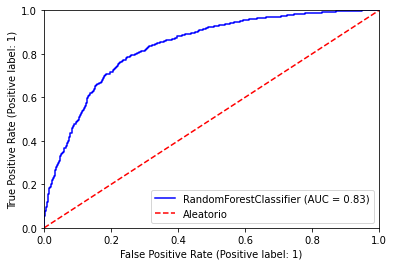

In [104]:
import matplotlib.pyplot as plt
y_pred_val = model_rf_opt.predict_proba(X_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_val)
#print('AUC =', auc_roc)
#fig = plt.figure(figsize=(12,4))
#fig, ax = plt.subplots(figsize = (12,8))
plot_roc_curve(model_rf_opt, X_test, y_test, color = 'blue')
#RocCurveDisplay.from_estimator(model_rf_opt, X_test, y_test, color = 'blue')
plt.plot([0,1], [0,1], linestyle='--', label = 'Aleatorio', color = 'red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

FixedFormatter should only be used together with FixedLocator


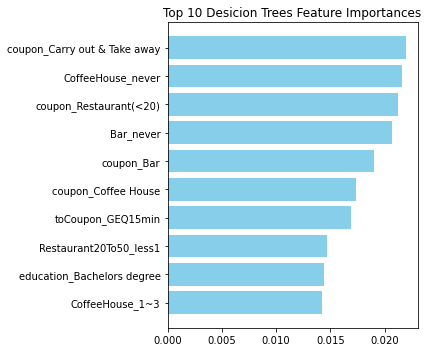

In [105]:
# Importancia de variables
feature_names = X_test.columns#.tolist()
tree_feature_importances = model_rf_opt.feature_importances_
sorted_idx = tree_feature_importances.argsort()

n_import = 10
y_ticks = np.arange(0, len(feature_names))[-n_import:]
fig, ax = plt.subplots(figsize = (6,5))
ax.barh(y_ticks[-n_import:], tree_feature_importances[sorted_idx][-n_import:], color = 'skyblue')
ax.set_yticklabels(feature_names[sorted_idx][-n_import:])
ax.set_yticks(y_ticks)
ax.set_title("Top 10 Desicion Trees Feature Importances")
fig.tight_layout()
plt.show()

In [106]:
# Librería shape para encontrar mejor la importancia de las variables
#!pip install shap
import shap
import matplotlib.pylab as pl
# print the JS visualization code to the notebook
shap.initjs()

# Damos formato a la data.
X1 = X_test.merge(y_test, left_index = True, right_index = True, how = 'inner')
X1.rename(columns = {'Y':'target'}, inplace = True)
X1.head()

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),...,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,target
70,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
5202,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5644,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1328,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1305,0,1,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,1


In [107]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model_rf_opt)
shap_values = explainer.shap_values(X1)

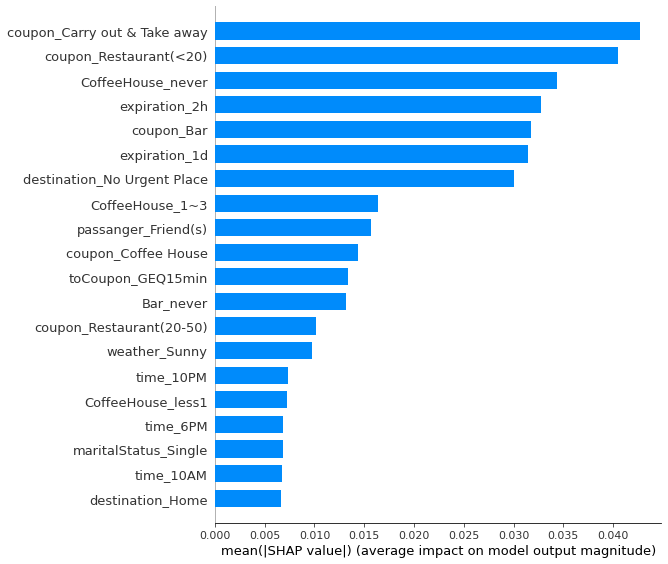

In [108]:
# Variables o impacto de las variables cuando target = 1
shap.summary_plot(shap_values[1], X1, plot_type="bar")

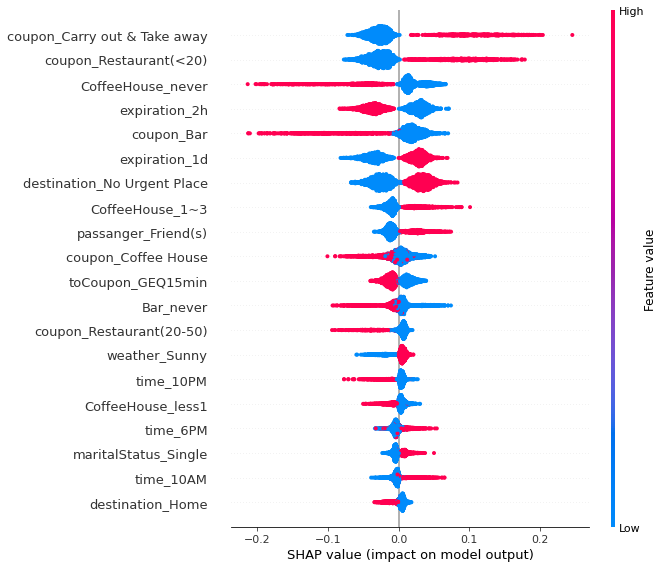

In [109]:
# Dirección o sentido  del impacto
shap.summary_plot(shap_values[1], X1)

### XGBoost

In [110]:
# Renombrar columnas
import re
nc = []
for columns in X_train.columns:
  nc.append(re.sub('[^a-zA-Z0-9]', '_', columns).strip())

In [111]:
X_train.columns = nc
X_test.columns = nc

In [114]:
# Entrenar modelo simple
#!pip install xgboost
from xgboost import XGBClassifier 

model_xgb_base = XGBClassifier()
model_xgb_base.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [115]:
print('Exactitud del modelo inicial en entrenamiento:', model_xgb_base.score(X_train, y_train))
print('Exactitud del modelo inicial en validación:', model_xgb_base.score(X_test, y_test))
print()

print('AUC del modelo inicial en entrenamiento:', roc_auc_score(y_train, model_xgb_base.predict_proba(X_train)[:,1]))
print('AUC del modelo inicial en validación:',roc_auc_score(y_test, model_xgb_base.predict_proba(X_test)[:,1]))

Exactitud del modelo inicial en entrenamiento: 0.9123711340206185
Exactitud del modelo inicial en validación: 0.7644726407613005

AUC del modelo inicial en entrenamiento: 0.9737573594260149
AUC del modelo inicial en validación: 0.8361564442189799


In [116]:
# Rendimiento del modelo en data de entrenamiento
model_lgbm_base_ptrain = performance_model(X_train, y_train, model_xgb_base)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.92      0.87      0.90      4362
           1       0.91      0.94      0.92      5726

    accuracy                           0.91     10088
   macro avg       0.91      0.91      0.91     10088
weighted avg       0.91      0.91      0.91     10088

Área bajo la curva = 0.9737573594260149

Matriz de confusión
[[3796  566]
 [ 318 5408]]


In [117]:
# Rendimiento del modelo en data de testeo
p_model_lgbm_base_ptest = performance_model(X_test, y_test, model_xgb_base)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.75      0.69      0.72      1091
           1       0.78      0.82      0.80      1431

    accuracy                           0.76      2522
   macro avg       0.76      0.76      0.76      2522
weighted avg       0.76      0.76      0.76      2522

Área bajo la curva = 0.8361564442189799

Matriz de confusión
[[ 754  337]
 [ 257 1174]]


In [118]:
# Búsqueda aleatoria de hiperparámetros
from pprint import pprint
import numpy as np

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = [int(x) for x in np.linspace(start = 20, stop = 100, num = 5)]
max_depth = [int(x) for x in np.linspace(5, 30, num = 5)]
learning_rate = [int(x)/1000 for x in np.linspace(start = 0, stop = 100, num = 5)]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'learning_rate': learning_rate}

print('Los valores a probar en la búsqueda aleatoria son:')
pprint(random_grid)

print()
print('Si se probara todas las combinaciones se requeriría entrenar', 
      len(random_grid['n_estimators']) *
      len(random_grid['max_features']) *
      len(random_grid['max_depth']) *
      len(random_grid['learning_rate']),
      'modelos'
      ) 

Los valores a probar en la búsqueda aleatoria son:
{'learning_rate': [0.0, 0.025, 0.05, 0.075, 0.1],
 'max_depth': [5, 11, 17, 23, 30],
 'max_features': [20, 40, 60, 80, 100],
 'n_estimators': [20, 65, 110, 155, 200]}

Si se probara todas las combinaciones se requeriría entrenar 625 modelos


In [122]:
# Encontraremos los mejores parámetros utilizando el 10% de las combinaciones posibles.
n_iter = int(875   *0.01
            )
n_iter

8

In [123]:
%%time
from sklearn.model_selection import RandomizedSearchCV
model_xgb_opt = XGBClassifier()
model_xgb_opt = RandomizedSearchCV(estimator = model_xgb_opt, 
                               param_distributions = random_grid, 
                               n_iter = n_iter, 
                               cv = 3,          # Validación cruzada 3-fold
                               verbose=2, 
                               random_state=0, 
                               n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )
model_xgb_opt.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[13:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Wall time: 45.5 s


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=

In [125]:
# Recuperamos los mejores hiperprámetros del modelo
model_xgb_opt_best = model_xgb_opt.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model_xgb_opt.best_params_)
print()

print('Exactitud luego de búsqueda aleatoria en entrenamiento:', model_xgb_opt_best.score(X_train, y_train))
print('Exactitud luego de búsqueda aleatoria en validación:', model_xgb_opt_best.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_xgb_opt_best.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_xgb_opt_best.predict_proba(X_test)[:,1]))

Los hiperparámetros del mejor modelo son:
{'learning_rate': 0.075,
 'max_depth': 17,
 'max_features': 20,
 'n_estimators': 200}

Exactitud luego de búsqueda aleatoria en entrenamiento: 0.998116574147502
Exactitud luego de búsqueda aleatoria en validación: 0.7636796193497224

AUC luego de búsqueda aleatoria en entrenamiento: 0.9999927732970886
AUC luego de búsqueda aleatoria en validación: 0.837103139145579


In [126]:
# Utilizamos los mejores parámetros encontrados anteriormente, para configurar valores cercanos y utilizarlos en greadsearch.
max_depth = [5,10,20]
max_features = [10,20]
n_estimators = [100,200]
learning_rate = [0.01,0.1, 0.075]


search_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'learning_rate': learning_rate}

print('Los valores a probar en la búsqueda por grilla son:')
pprint(search_grid)

Los valores a probar en la búsqueda por grilla son:
{'learning_rate': [0.01, 0.1, 0.075],
 'max_depth': [5, 10, 20],
 'max_features': [10, 20],
 'n_estimators': [100, 200]}


In [127]:
%%time
from sklearn.model_selection import GridSearchCV

model_xgb_opt = XGBClassifier()
model_xgb_opt = GridSearchCV(estimator = model_xgb_opt, 
                        param_grid = search_grid, 
                        cv = 3,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )
model_xgb_opt.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[13:52:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Wall time: 2min 51s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [128]:
model_xgb_opt_best = model_xgb_opt.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model_xgb_opt.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento:', model_xgb_opt_best.score(X_train, y_train))
print('Exactitud luego de búsqueda en grilla en validación:', model_xgb_opt_best.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_xgb_opt_best.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_xgb_opt_best.predict_proba(X_test)[:,1]))

Los hiperparámetros del mejor modelo son:
{'learning_rate': 0.075,
 'max_depth': 10,
 'max_features': 10,
 'n_estimators': 200}

Exactitud luego de búsqueda en grilla en entrenamiento: 0.9804718477398889
Exactitud luego de búsqueda en grilla en validación: 0.7751784298176051

AUC luego de búsqueda aleatoria en entrenamiento: 0.9989226607462954
AUC luego de búsqueda aleatoria en validación: 0.8453037718554899


In [129]:
# Reentrenamiento del modelo con los mejores parámetros.
#Entrenamos el árbol de clasificación - Modelo base.
model_xgb_opt = XGBClassifier(max_depth=10, max_features=10, n_estimators=200, learning_rate = 0.075)

model_xgb_opt.fit(X_train, y_train)

[13:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.075, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_features=10, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [130]:
print('Exactitud luego de búsqueda en grilla en entrenamiento:', model_xgb_opt.score(X_train, y_train))
print('Exactitud luego de búsqueda en grilla en validación:', model_xgb_opt.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_xgb_opt.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_xgb_opt.predict_proba(X_test)[:,1]))

Exactitud luego de búsqueda en grilla en entrenamiento: 0.9804718477398889
Exactitud luego de búsqueda en grilla en validación: 0.7751784298176051

AUC luego de búsqueda aleatoria en entrenamiento: 0.9989226607462954
AUC luego de búsqueda aleatoria en validación: 0.8453037718554899


In [131]:
# Rendimiento del modelo en data de entrenamiento
model_lgbm_base_ptrain = performance_model(X_train, y_train, model_xgb_opt)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.99      0.97      0.98      4362
           1       0.98      0.99      0.98      5726

    accuracy                           0.98     10088
   macro avg       0.98      0.98      0.98     10088
weighted avg       0.98      0.98      0.98     10088

Área bajo la curva = 0.9989226607462954

Matriz de confusión
[[4219  143]
 [  54 5672]]


In [132]:
# Rendimiento del modelo en data de validación
model_lgbm_base_ptest = performance_model(X_test, y_test, model_xgb_opt)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.76      0.70      0.73      1091
           1       0.78      0.83      0.81      1431

    accuracy                           0.78      2522
   macro avg       0.77      0.77      0.77      2522
weighted avg       0.77      0.78      0.77      2522

Área bajo la curva = 0.8453037718554899

Matriz de confusión
[[ 764  327]
 [ 240 1191]]


In [133]:
# Guardar modelo entrenado.
import pickle
with open('model_xgb_opt.pkl', 'wb') as f:
  pickle.dump(model_xgb_opt, f)

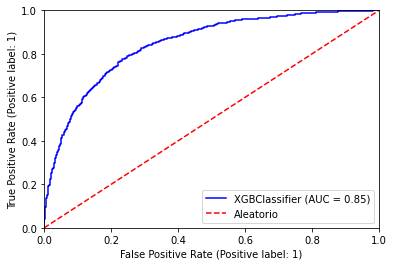

In [134]:
# Curva AUC
import matplotlib.pyplot as plt
y_pred_val = model_xgb_opt.predict_proba(X_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_val)
#print('AUC =', auc_roc)
#fig = plt.figure(figsize=(12,4))
#fig, ax = plt.subplots(figsize = (12,8))
#RocCurveDisplay.from_estimator(model_xgb_opt, X_test, y_test, color = 'blue')
plot_roc_curve(model_xgb_opt, X_test, y_test, color = 'blue')
plt.plot([0,1], [0,1], linestyle='--', label = 'Aleatorio', color = 'red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

FixedFormatter should only be used together with FixedLocator


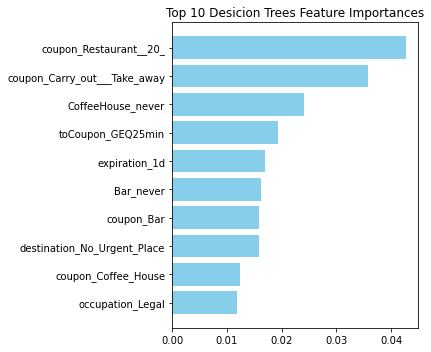

In [135]:
# Importancia de variables
feature_names = X_test.columns#.tolist()
tree_feature_importances = model_xgb_opt.feature_importances_
sorted_idx = tree_feature_importances.argsort()

n_import = 10
y_ticks = np.arange(0, len(feature_names))[-n_import:]
fig, ax = plt.subplots(figsize = (6,5))
ax.barh(y_ticks[-n_import:], tree_feature_importances[sorted_idx][-n_import:], color = 'skyblue')
ax.set_yticklabels(feature_names[sorted_idx][-n_import:])
ax.set_yticks(y_ticks)
ax.set_title("Top 10 Desicion Trees Feature Importances")
fig.tight_layout()
plt.show()

In [136]:
#!pip install shap
#https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html
# Explicando variables
import shap
import matplotlib.pylab as pl
# print the JS visualization code to the notebook
shap.initjs()

In [142]:
#X.columns = X_train.columns
# Damos formato a la data.
import xgboost
#X1 = X_test.merge(y_test, left_index = True, right_index = True, how = 'inner')
#X1.rename(columns = {'Y':'target'}, inplace = True)
#X1.head()

In [143]:
%%time
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model_xgb_opt)
shap_values = explainer.shap_values(X_test, y_test)

Wall time: 8.95 s


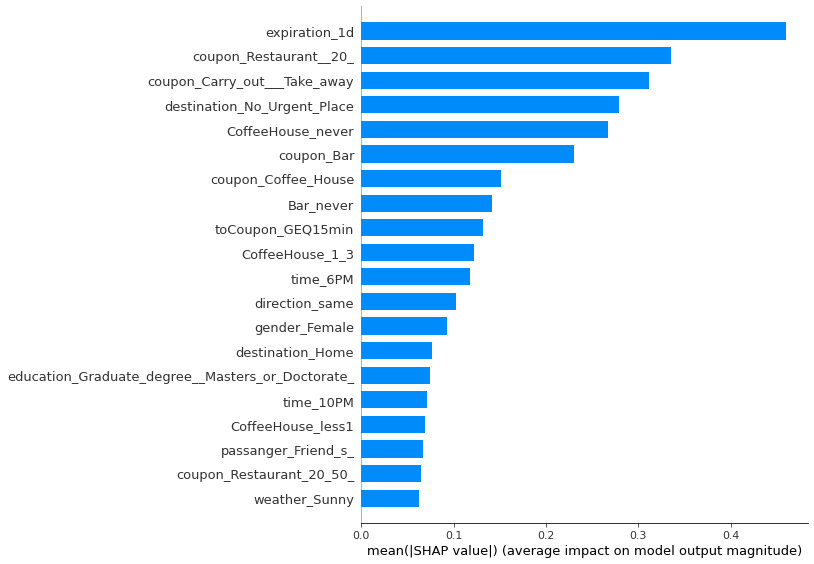

In [146]:
# Variables o impacto de las variables cuando target = 1
shap.summary_plot(shap_values, X_test, plot_type="bar")

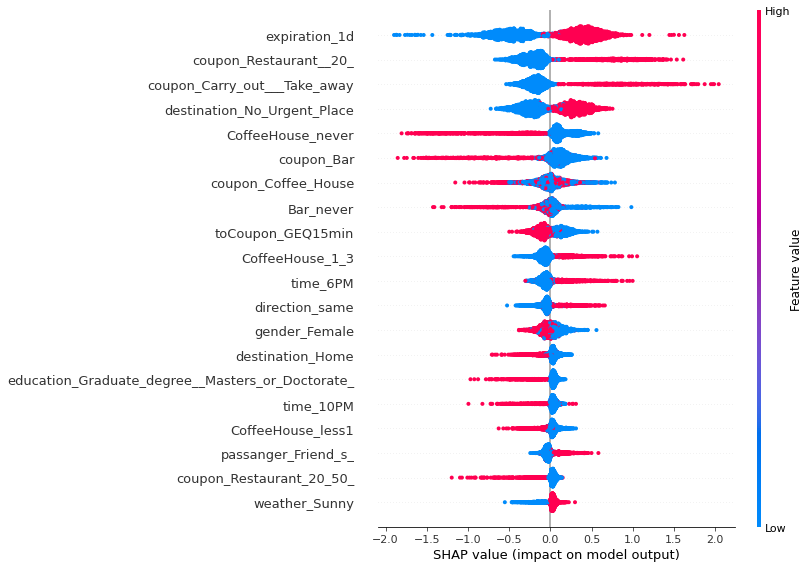

In [147]:
# Dirección o sentido  del impacto
shap.summary_plot(shap_values, X_test)

### LightGBM

In [160]:
# Entrenar modelo simple
#!pip install xgboost
#!pip install lightgbm
import lightgbm
from lightgbm import LGBMClassifier

model_lgbm_base = LGBMClassifier()
model_lgbm_base.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


LGBMClassifier()

In [161]:
print('Exactitud del modelo inicial en entrenamiento:', model_lgbm_base.score(X_train, y_train))
print('Exactitud del modelo inicial en validación:', model_lgbm_base.score(X_test, y_test))
print()

print('AUC del modelo inicial en entrenamiento:', roc_auc_score(y_train, model_lgbm_base.predict_proba(X_train)[:,1]))
print('AUC del modelo inicial en validación:',roc_auc_score(y_test, model_lgbm_base.predict_proba(X_test)[:,1]))

Exactitud del modelo inicial en entrenamiento: 0.816812053925456
Exactitud del modelo inicial en validación: 0.7509912767644726

AUC del modelo inicial en entrenamiento: 0.9061441868561929
AUC del modelo inicial en validación: 0.8250593605902046


In [162]:
# Rendimiento del modelo en data de entrenamiento
model_lgbm_base_ptrain = performance_model(X_train, y_train, model_lgbm_base)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.82      0.73      0.78      4362
           1       0.81      0.88      0.85      5726

    accuracy                           0.82     10088
   macro avg       0.82      0.81      0.81     10088
weighted avg       0.82      0.82      0.82     10088

Área bajo la curva = 0.9061441868561929

Matriz de confusión
[[3192 1170]
 [ 678 5048]]


In [163]:
# Rendimiento del modelo en data de test
model_lgbm_base_ptrain = performance_model(X_test, y_test, model_lgbm_base)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.74      0.66      0.70      1091
           1       0.76      0.82      0.79      1431

    accuracy                           0.75      2522
   macro avg       0.75      0.74      0.74      2522
weighted avg       0.75      0.75      0.75      2522

Área bajo la curva = 0.8250593605902046

Matriz de confusión
[[ 718  373]
 [ 255 1176]]


In [164]:
# Búsqueda aleatoria de hiperparámetros
from pprint import pprint
import numpy as np

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = [int(x) for x in np.linspace(start = 20, stop = 100, num = 5)]
max_depth = [int(x) for x in np.linspace(5, 30, num = 5)]
learning_rate = [int(x)/1000 for x in np.linspace(start = 0, stop = 100, num = 5)]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'learning_rate': learning_rate}

print('Los valores a probar en la búsqueda aleatoria son:')
pprint(random_grid)

print()
print('Si se probara todas las combinaciones se requeriría entrenar', 
      len(random_grid['n_estimators']) *
      len(random_grid['max_features']) *
      len(random_grid['max_depth']) *
      len(random_grid['learning_rate']),
      'modelos'
      ) 

Los valores a probar en la búsqueda aleatoria son:
{'learning_rate': [0.0, 0.025, 0.05, 0.075, 0.1],
 'max_depth': [5, 11, 17, 23, 30],
 'max_features': [20, 40, 60, 80, 100],
 'n_estimators': [20, 65, 110, 155, 200]}

Si se probara todas las combinaciones se requeriría entrenar 625 modelos


In [174]:
# Encontraremos los mejores parámetros utilizando el 10% de las combinaciones posibles.
n_iter = int(875   *0.1
            )
n_iter

87

In [175]:
%%time
from sklearn.model_selection import RandomizedSearchCV
model_lgbm_opt = LGBMClassifier()
model_lgbm_opt = RandomizedSearchCV(estimator = model_lgbm_opt, 
                               param_distributions = random_grid, 
                               n_iter = n_iter, 
                               cv = 3,          # Validación cruzada 3-fold
                               verbose=2, 
                               random_state=0, 
                               n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )
model_lgbm_opt.fit(X_train, y_train)

Fitting 3 folds for each of 87 candidates, totalling 261 fits


One or more of the test scores are non-finite: [0.73265306 0.74484592 0.71798176 0.74484633 0.75029802        nan
 0.69805672 0.71798176 0.74514392 0.73572598 0.74474698 0.75168567
 0.71917112        nan 0.74484592 0.73483348 0.72026142 0.73860055
 0.74425094 0.71798176 0.72868761 0.72868761 0.73483348 0.74484633
 0.72343363 0.71798176 0.72026142 0.73265306        nan 0.73830302
 0.69805672 0.74672957 0.74444962 0.74425106        nan 0.69805672
 0.7460358  0.69805672        nan        nan 0.71342181 0.72353275
 0.74464803 0.71342181 0.75168567        nan 0.73265306 0.74910825
 0.74484633        nan 0.72848958 0.72848958 0.73483348 0.69805672
 0.75168567        nan        nan        nan 0.74752245 0.70915901
 0.74444962 0.73830302 0.74663039 0.72353275 0.74663039 0.70856468
        nan 0.74672957 0.72026142        nan 0.74672957 0.72848958
 0.73433821 0.69766025 0.69805672 0.71917112 0.71827909 0.74663039
 0.72353275        nan 0.72412766 0.73572598 0.75168567        nan
 0.74464803    

Wall time: 7.96 s


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=87, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0, 0.025, 0.05,
                                                          0.075, 0.1],
                                        'max_depth': [5, 11, 17, 23, 30],
                                        'max_features': [20, 40, 60, 80, 100],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=0, verbose=2)

In [177]:
# Recuperamos los mejores hiperprámetros del modelo
model_lgbm_opt_best = model_lgbm_opt.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model_lgbm_opt.best_params_)
print()

print('Exactitud luego de búsqueda aleatoria en entrenamiento:', model_lgbm_opt_best.score(X_train, y_train))
print('Exactitud luego de búsqueda aleatoria en validación:', model_lgbm_opt_best.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_lgbm_opt_best.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_lgbm_opt_best.predict_proba(X_test)[:,1]))

Los hiperparámetros del mejor modelo son:
{'learning_rate': 0.075,
 'max_depth': 23,
 'max_features': 100,
 'n_estimators': 200}

Exactitud luego de búsqueda aleatoria en entrenamiento: 0.8495241871530531
Exactitud luego de búsqueda aleatoria en validación: 0.7593180015860428

AUC luego de búsqueda aleatoria en entrenamiento: 0.9331586032677027
AUC luego de búsqueda aleatoria en validación: 0.8337198897529561


In [178]:
# Utilizamos los mejores parámetros encontrados anteriormente, para configurar valores cercanos y utilizarlos en greadsearch.
max_depth = [5,10,20]
max_features = [50,100]
n_estimators = [100,200,300]
learning_rate = [0.01,0.1, 0.075]


search_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'learning_rate': learning_rate}

print('Los valores a probar en la búsqueda por grilla son:')
pprint(search_grid)

Los valores a probar en la búsqueda por grilla son:
{'learning_rate': [0.01, 0.1, 0.075],
 'max_depth': [5, 10, 20],
 'max_features': [50, 100],
 'n_estimators': [100, 200, 300]}


In [180]:
%%time
from sklearn.model_selection import GridSearchCV

model_lgbm_opt = LGBMClassifier()
model_lgbm_opt = GridSearchCV(estimator = model_lgbm_opt, 
                        param_grid = search_grid, 
                        cv = 3,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )
model_lgbm_opt.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Wall time: 9.91 s


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.075],
                         'max_depth': [5, 10, 20], 'max_features': [50, 100],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [181]:
model_lgbm_opt_best = model_lgbm_opt.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model_lgbm_opt.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento:', model_lgbm_opt_best.score(X_train, y_train))
print('Exactitud luego de búsqueda en grilla en validación:', model_lgbm_opt_best.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train,model_lgbm_opt_best.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_lgbm_opt_best.predict_proba(X_test)[:,1]))

Los hiperparámetros del mejor modelo son:
{'learning_rate': 0.1, 'max_depth': 10, 'max_features': 50, 'n_estimators': 300}

Exactitud luego de búsqueda en grilla en entrenamiento: 0.9052339413164155
Exactitud luego de búsqueda en grilla en validación: 0.7724028548770817

AUC luego de búsqueda aleatoria en entrenamiento: 0.9710187393010766
AUC luego de búsqueda aleatoria en validación: 0.8432483293524747


In [182]:
# Reentrenamiento del modelo con los mejores parámetros.
#Entrenamos el árbol de clasificación - Modelo base.
model_lgbm_opt = LGBMClassifier(max_depth=10, max_features=50, n_estimators=300, learning_rate = 0.1)

model_lgbm_opt.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[LightGBM] [Warning] Unknown parameter: max_features


LGBMClassifier(max_depth=10, max_features=50, n_estimators=300)

In [183]:
# Rendimiento del modelo en data de entrenamiento
model_lgbm_base_ptrain = performance_model(X_train, y_train, model_lgbm_opt)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.91      0.86      0.89      4362
           1       0.90      0.94      0.92      5726

    accuracy                           0.91     10088
   macro avg       0.91      0.90      0.90     10088
weighted avg       0.91      0.91      0.90     10088

Área bajo la curva = 0.9710187393010766

Matriz de confusión
[[3760  602]
 [ 354 5372]]


In [184]:
# Rendimiento del modelo en data de entrenamiento
model_lgbm_base_ptrain = performance_model(X_test, y_test, model_lgbm_opt)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.76      0.70      0.73      1091
           1       0.78      0.83      0.81      1431

    accuracy                           0.77      2522
   macro avg       0.77      0.76      0.77      2522
weighted avg       0.77      0.77      0.77      2522

Área bajo la curva = 0.8432483293524747

Matriz de confusión
[[ 760  331]
 [ 243 1188]]


In [185]:
# Guardar modelo entrenado.
import pickle
with open('model_xgb_opt.pkl', 'wb') as f:
  pickle.dump(model_lgbm_opt, f)

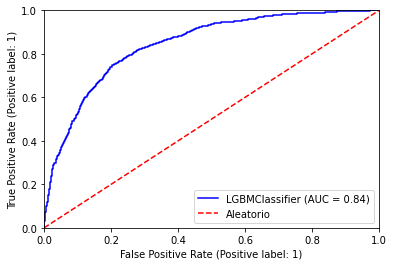

In [186]:
# Curva AUC
import matplotlib.pyplot as plt
y_pred_val = model_lgbm_opt.predict_proba(X_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_val)
#print('AUC =', auc_roc)
#fig = plt.figure(figsize=(12,4))
#fig, ax = plt.subplots(figsize = (12,8))
#RocCurveDisplay.from_estimator(model_xgb_opt, X_test, y_test, color = 'blue')
plot_roc_curve(model_lgbm_opt, X_test, y_test, color = 'blue')
plt.plot([0,1], [0,1], linestyle='--', label = 'Aleatorio', color = 'red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

FixedFormatter should only be used together with FixedLocator


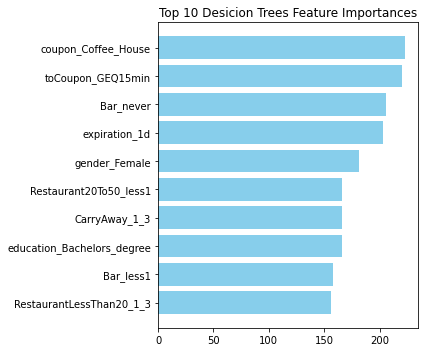

In [187]:
# Importancia de variables
feature_names = X_test.columns#.tolist()
tree_feature_importances = model_lgbm_opt.feature_importances_
sorted_idx = tree_feature_importances.argsort()

n_import = 10
y_ticks = np.arange(0, len(feature_names))[-n_import:]
fig, ax = plt.subplots(figsize = (6,5))
ax.barh(y_ticks[-n_import:], tree_feature_importances[sorted_idx][-n_import:], color = 'skyblue')
ax.set_yticklabels(feature_names[sorted_idx][-n_import:])
ax.set_yticks(y_ticks)
ax.set_title("Top 10 Desicion Trees Feature Importances")
fig.tight_layout()
plt.show()

In [188]:
#!pip install shap
#https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html
# Explicando variables
import shap
import matplotlib.pylab as pl
# print the JS visualization code to the notebook
shap.initjs()

In [190]:
%%time
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model_lgbm_opt)
shap_values = explainer.shap_values(X_test, y_test)

Wall time: 1.56 s


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


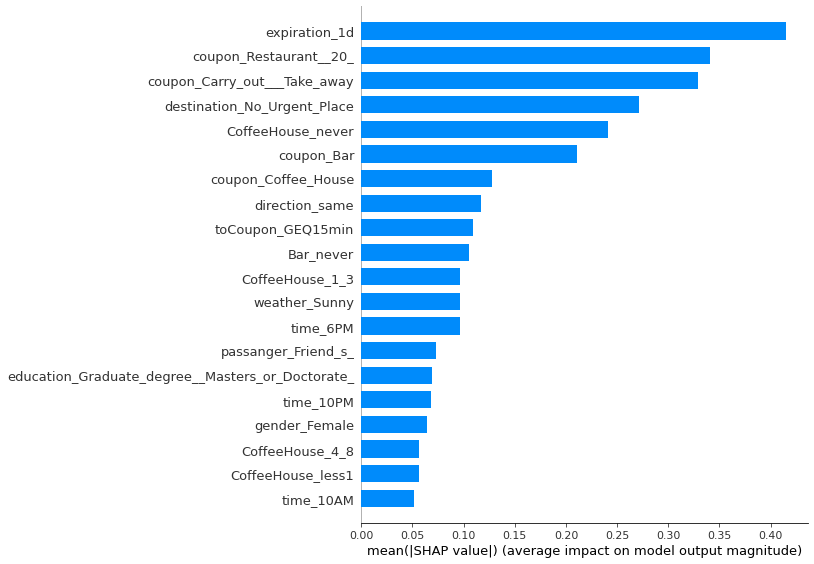

In [192]:
# Variables o impacto de las variables cuando target = 1
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

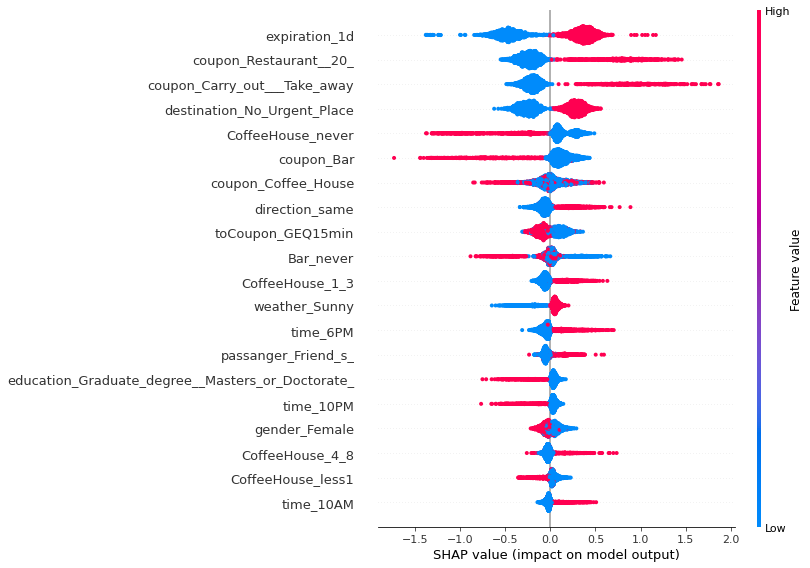

In [193]:
# Dirección o sentido  del impacto
shap.summary_plot(shap_values[1], X_test)